# Importing Dataset and preparing setup.
Dataset have size of 569 MB as well as 1516064 rows and 47 columns  

kaggle link: 
https://www.kaggle.com/sobhanmoosavi/us-accidents




In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


# Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values
4. Understanding and learning from data


In [3]:
data = '/content/us-accidents/US_Accidents_Dec20_updated.csv'

In [53]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
df = pd.read_csv(data)

In [55]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


count numerical columns only

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [10]:
missing_percentages = df.isna().sum().sort_values(ascending= False) / len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

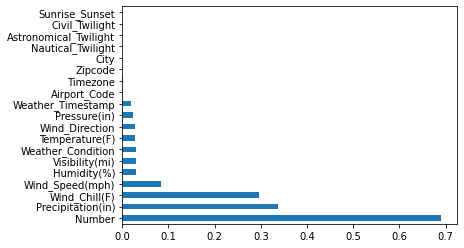

In [11]:
missing_percentages[missing_percentages>0].plot(kind='barh')

# Exploratory Analysis and Visualization

In [12]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [14]:
# getting total number of cities in data set
cities = df.City.unique()
len(cities)

10658

In [15]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles                39984
Miami                      36233
Charlotte                  22203
Houston                    20843
Dallas                     19497
                           ...  
Buckfield                      1
East Central Washington        1
Albers                         1
Brook                          1
Alcova                         1
Name: City, Length: 10657, dtype: int64

In [16]:
cities_by_accidents[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

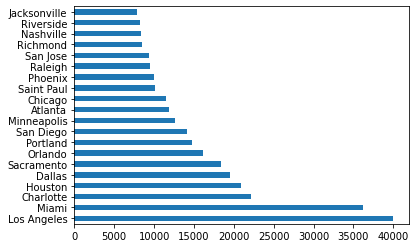

In [18]:
cities_by_accidents[:20].plot(kind = 'barh')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


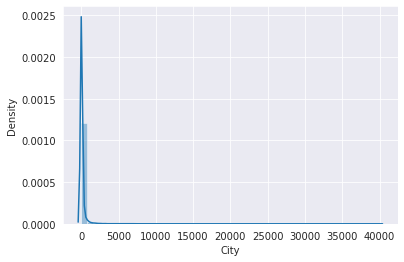

In [20]:
sns.distplot(cities_by_accidents)

In [21]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [22]:
len(high_accident_cities) / len(cities)*100

2.3550384687558643

less than 3% of cities have more than 1000 yearly accidents.

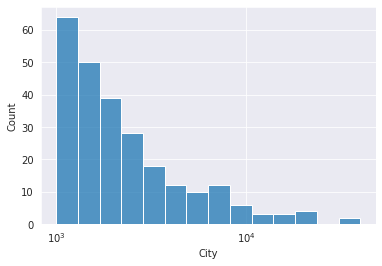

In [23]:
sns.histplot(high_accident_cities, log_scale= True)

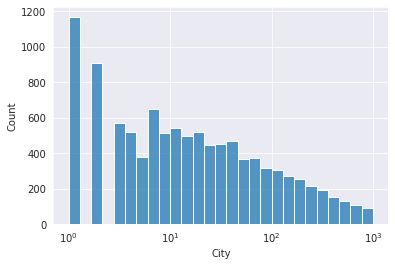

In [24]:
sns.histplot(low_accident_cities, log_scale= True)

The number of accidents per city decreases exponentially

In [25]:
cities_by_accidents[cities_by_accidents == 1]

Dennistown                 1
Ketchum                    1
South Dayton               1
Camanche                   1
Manteo                     1
                          ..
Buckfield                  1
East Central Washington    1
Albers                     1
Brook                      1
Alcova                     1
Name: City, Length: 1167, dtype: int64

Over 1100 cities have reported just one accident (need to investigate)

In [26]:
len(low_accident_cities)

10406

In [27]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [28]:
pd.to_datetime(df.Start_Time)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [29]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [30]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


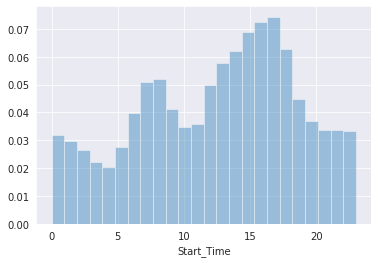

In [31]:
sns.distplot(df.Start_Time.dt.hour, bins = 24,kde = False, norm_hist = True )

A high percentage of accidents occur between 3 pm to 6 pm (probably people in a hurry to get to home)

Next higest percentage is 6 am to 9 am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


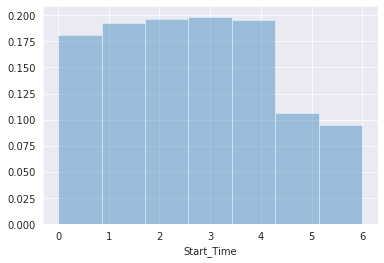

In [32]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7,kde = False, norm_hist = True )

Is the distribution of accidents by hour the same on weekends as on weekdays.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


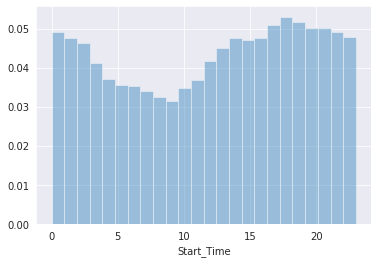

In [33]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins = 24,kde = False, norm_hist = True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


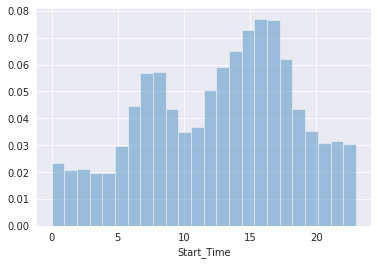

In [34]:
monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday.dt.hour, bins = 24,kde = False, norm_hist = True )

On Sundays, the peak occurs between 11 am and 6 pm, unlike weekdays



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


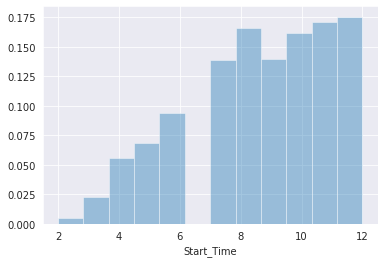

In [35]:
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


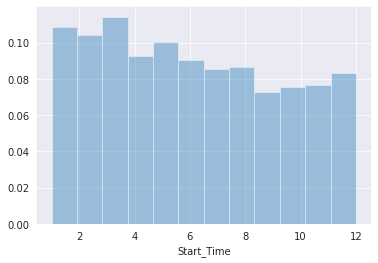

In [36]:
df_year = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Much data is missing for 2016

# **Answering Relevent Questions**

Which days of the week have the most accidents? **bold text**





### Which 5 cities has the highest number of accidents?

In [40]:
cities_by_accidents[:5]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

###  Does New York show up in the data? 
###  (New york is 1st city in the List of United States cities by population and why it is not in top 5 cities having highest number of accidents)

In [48]:
exists_city = 'New York' in df.City
print(exists_city)

False


Dataset does not contains data about new york

###  What time of the day are accidents most frequent in?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


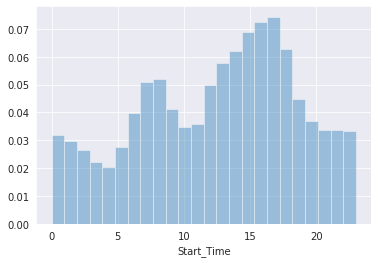

In [50]:
sns.distplot(df.Start_Time.dt.hour, bins = 24,kde = False, norm_hist = True )

A high percentage of accidents occur between 3 pm to 6 pm (probably people in a hurry to get to home)

Next higest percentage is 6 am to 9 am.

###  What is time of the weekends accidents occur most frequent in?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


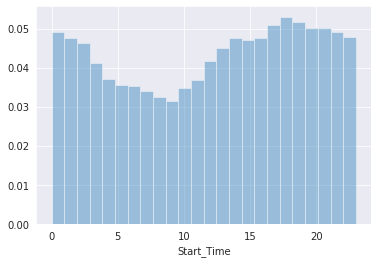

In [51]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins = 24,kde = False, norm_hist = True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


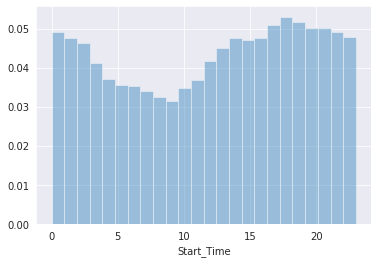

In [52]:
saturday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(saturday.dt.hour, bins = 24,kde = False, norm_hist = True )

On weekends, the peak occurs between 12 pm and 5 pm, unlike weekdays

## Summary and Conclusion
Insights:

1. No data from New York
2. less than 3% of cities have more than 1000 yearly accidents.
3. Over 1100 cities have reported just one accident (need to investigate)
4. data points are missing for year 2016

Areas of future work:

1. Accident analysis according to weather Humidity(%) 'Pressure(in) 'Visibility(mi)
2. Accident analysis according to road condition (related columns 'Bump', 'Crossing')